<a href="https://colab.research.google.com/github/yakshita24/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Data Pre-processing

In [ ]:

file_path = '/content/drive/My Drive/fake-news/train.csv'

import pandas as pd
news_dataset = pd.read_csv(file_path)

print(news_dataset.shape)



(20800, 5)


In [ ]:

news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:

news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:

news_dataset = news_dataset.fillna('')

In [ ]:

news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:

X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:



In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:

X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (20797, 8364)	0.22322585870464115
  (20797, 8988)	0.36160868928090795
  (20797, 9518)	0.29542040034203126
  (20797, 9588)	0.17455348

Splitting the dataset to training & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(Y_train, train_pred)
    test_accuracy = accuracy_score(Y_test, test_pred)

    return {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

results = {}

log_model = LogisticRegression()
results['Logistic Regression'] = train_and_evaluate(log_model, X_train, X_test, Y_train, Y_test)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, min_samples_leaf=4, random_state=42)
results['Random Forest'] = train_and_evaluate(rf_model, X_train, X_test, Y_train, Y_test)

svm_model = SVC(C=0.5, kernel='linear', random_state=42)
results['SVM'] = train_and_evaluate(svm_model, X_train, X_test, Y_train, Y_test)



for model_name, result in results.items():
    print(f"{model_name} - Training Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")


Logistic Regression - Training Accuracy: 0.9864, Test Accuracy: 0.9791
Random Forest - Training Accuracy: 0.9053, Test Accuracy: 0.8998
SVM - Training Accuracy: 0.9934, Test Accuracy: 0.9870


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:

    cm = confusion_matrix(Y_test, test_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

    return {'train_accuracy': train_acc, 'test_accuracy': test_acc, 'confusion_matrix': cm}


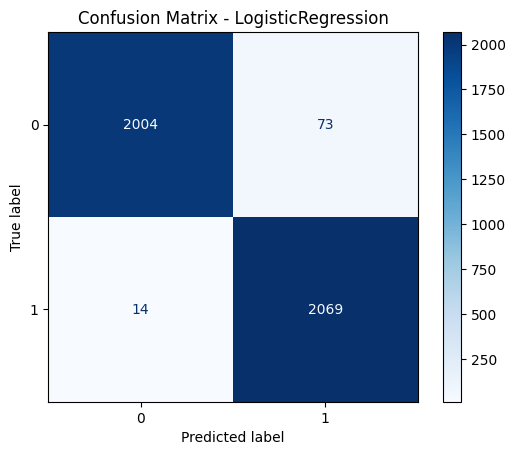

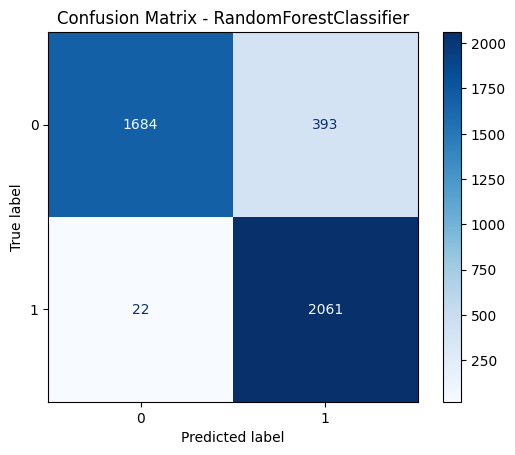

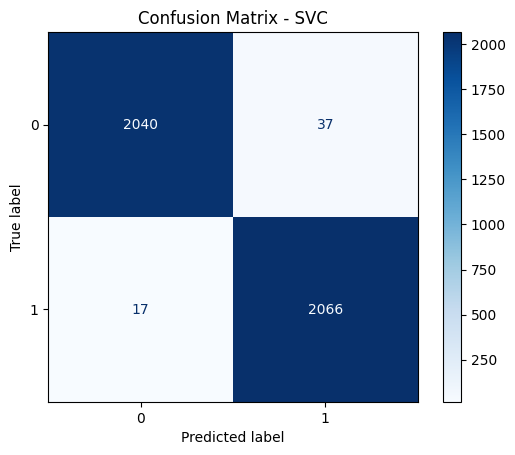

Logistic Regression - Training Accuracy: 0.9864, Test Accuracy: 0.9791
Random Forest - Training Accuracy: 0.9091, Test Accuracy: 0.9002
SVM - Training Accuracy: 0.9934, Test Accuracy: 0.9870


In [ ]:

results = {}


log_model = LogisticRegression()
results['Logistic Regression'] = train_and_evaluate(log_model, X_train, X_test, Y_train, Y_test)


rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)

rf_model.fit(X_train, Y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_acc = accuracy_score(Y_train, rf_train_pred)
rf_test_acc = accuracy_score(Y_test, rf_test_pred)
results['Random Forest'] = train_and_evaluate(rf_model, X_train, X_test, Y_train, Y_test)


svm_model = SVC(C=0.5, kernel='linear', random_state=42)
results['SVM'] = train_and_evaluate(svm_model, X_train, X_test, Y_train, Y_test)

for model_name, result in results.items():
    print(f"{model_name} - Training Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")


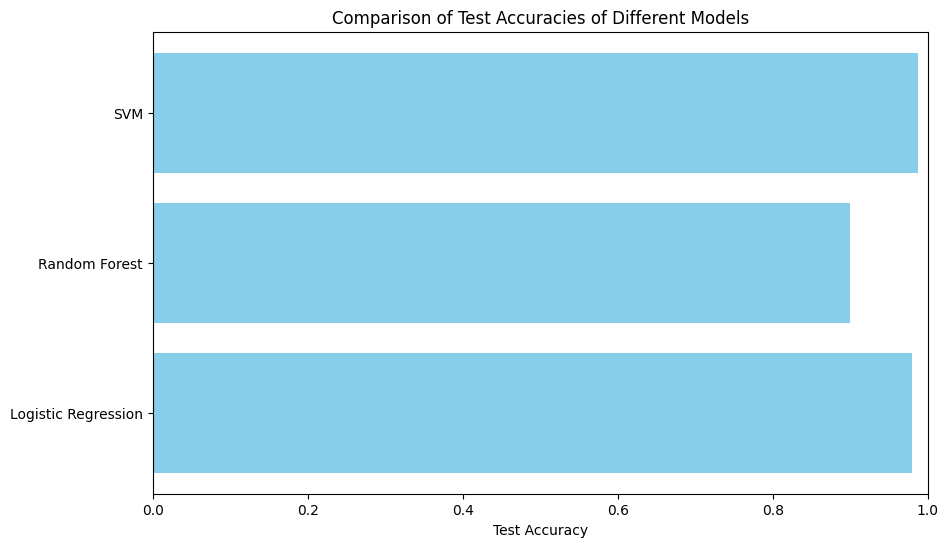

In [ ]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
test_accuracies = [results[model]['test_accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, test_accuracies, color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Comparison of Test Accuracies of Different Models')
plt.xlim(0, 1)
plt.show()


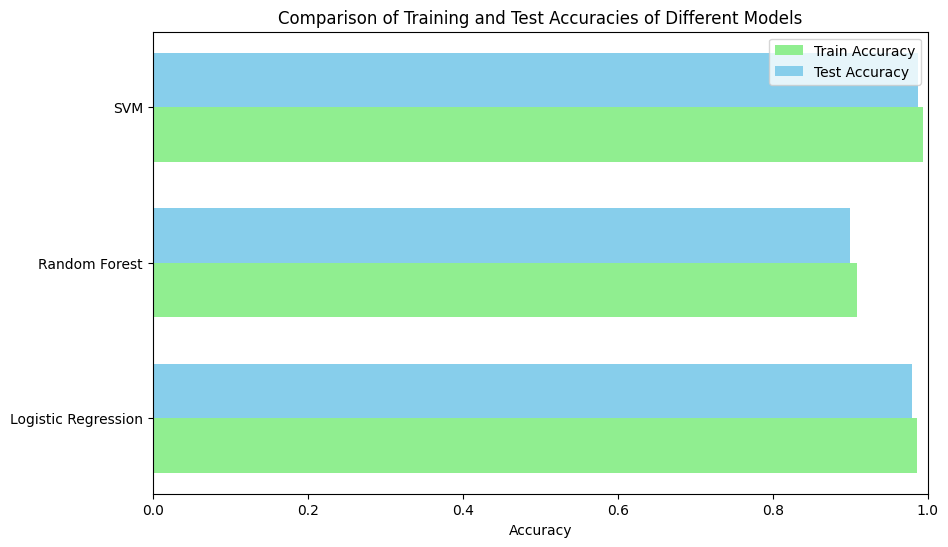

In [ ]:

train_accuracies = [results[model]['train_accuracy'] for model in model_names]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(model_names))
bars1 = ax.barh(index, train_accuracies, bar_width, label='Train Accuracy', color='lightgreen')
bars2 = ax.barh([i + bar_width for i in index], test_accuracies, bar_width, label='Test Accuracy', color='skyblue')

ax.set_xlabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracies of Different Models')
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(model_names)
ax.legend()

plt.xlim(0, 1)
plt.show()


In [ ]:
best_model_name = None
best_model_accuracy = 0
for model_name, result in results.items():
    print(f"{model_name} - Training Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")

    if result['test_accuracy'] > best_model_accuracy:
        best_model_accuracy = result['test_accuracy']
        best_model_name = model_name


print(f"\nThe best model for fake news detection is: {best_model_name} with a test accuracy of {best_model_accuracy:.4f}")

Logistic Regression - Training Accuracy: 0.9864, Test Accuracy: 0.9791
Random Forest - Training Accuracy: 0.9091, Test Accuracy: 0.9002
SVM - Training Accuracy: 0.9934, Test Accuracy: 0.9870

The best model for fake news detection is: SVM with a test accuracy of 0.9870


In [ ]:

model1 = log_model  #  Logistic Regression model
model2 = rf_model # Random Forest model
model3 = svm_model # Support Vector Machine model
# Select the 3rd sample from X_test
X_new = X_test[3]
X_new = X_new.reshape(1, -1)  # Reshape to 2D for the prediction

# Make the prediction for logistic
print('Prediction by logistic regression model')
prediction = model1.predict(X_new)
print(prediction)

# Interpret the result
if prediction[0] == 0:
    print('The news is Real')
else:
    print('The news is Fake')


# Make the prediction for random forest
print('Prediction by random forest model')
prediction = model1.predict(X_new)
print(prediction)

# Interpret the result
if prediction[0] == 0:
    print('The news is Real')
else:
    print('The news is Fake')


# Make the prediction for svm
print('Prediction by svm model')
prediction = model1.predict(X_new)
print(prediction)

# Interpret the result
if prediction[0] == 0:
    print('The news is Real')
else:
    print('The news is Fake')


# Optionally, display the original text for verification
original_text = news_dataset['content'].iloc[3]
print(f"Original News Text: {original_text}")



Prediction by logistic regression model
[0]
The news is Real
Prediction by random forest model
[0]
The news is Real
Prediction by svm model
[0]
The news is Real
Original News Text: jessica purkiss civilian kill singl us airstrik identifi


In [ ]:
print(Y_test[3])

0
